In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jax.numpy as jnp
import jax
from tqdm.notebook import tqdm
from collections import Counter

Link to the [dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

In [ ]:
data = pd.read_csv('drive/MyDrive/creditcard.csv', delimiter=',')

## Data inspection

Display some basic information.

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
n_samples, n_features = data.shape
n_frauds = np.sum(data['Class'])

print('%d samples' %n_samples)
print('%d features' %n_features)
print('%d frauds' %n_frauds)

284807 samples
31 features
492 frauds


In [ ]:
data.info() # there aren't null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Attribute vectors

In [ ]:
# Make the attribute vectors with the GA selected features
v1 = ['V1', 'V5', 'V7', 'V8', 'V11', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'Amount', 'Class'] # 'Class' added
data_1 = data[v1] 
v2 = ['V1', 'V6', 'V13', 'V16', 'V17', 'V22', 'V23', 'V28', 'Amount', 'Class']
data_2 = data[v2]
v3 = ['V2', 'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V24', 'V26', 'Amount', 'Class']
data_3 = data[v3]
v4 = ['V2', 'V7', 'V10', 'V13', 'V15', 'V17', 'V19', 'V28', 'Amount', 'Class']
data_4 = data[v4]
v5 = ['Time', 'V1', 'V7', 'V8', 'V9', 'V11', 'V12', 'V14', 'V15', 'V22', 'V27', 'V28', 'Amount', 'Class']
data_5 = data[v5]

In [ ]:
data_2.corr() # this and the following plots are not readable with the entire dataset, maybe do this just for the selected features

,V1,V6,V13,V16,V17,V22,V23,V28,Amount,Class
V1,1.000000e+00,-6.506567e-16,-2.425603e-17,7.212815e-17,-3.879840e-16,-4.290944e-16,6.168652e-16,2.083082e-15,-0.227709,-0.101347
V6,-6.506567e-16,1.000000e+00,-1.211182e-16,2.623672e-18,2.015618e-16,-4.705235e-19,1.046712e-16,2.594754e-16,0.215981,-0.043643
V13,-2.425603e-17,-1.211182e-16,1.000000e+00,6.044197e-16,7.584436e-17,6.747721e-17,-7.132064e-16,1.144372e-15,0.005293,-0.004570
V16,7.212815e-17,2.623672e-18,6.044197e-16,1.000000e+00,2.482413e-15,-7.923387e-17,5.020770e-16,7.588849e-16,-0.003910,-0.196539
V17,-3.879840e-16,2.015618e-16,7.584436e-17,2.482413e-15,1.000000e+00,-8.743398e-16,3.706214e-16,-5.534540e-17,0.007309,-0.326481
V22,-4.290944e-16,-4.705235e-19,6.747721e-17,-7.923387e-17,-8.743398e-16,1.000000e+00,-7.303916e-17,-6.627203e-16,-0.064801,0.000805
V23,6.168652e-16,1.046712e-16,-7.132064e-16,5.020770e-16,3.706214e-16,-7.303916e-17,1.000000e+00,1.481903e-15,-0.112633,-0.002685
V28,2.083082e-15,2.594754e-16,1.144372e-15,7.588849e-16,-5.534540e-17,-6.627203e-16,1.481903e-15,1.000000e+00,0.010258,0.009536
Amount,-2.277087e-01,2.159812e-01,5.293409e-03,-3.909527e-03,7.309042e-03,-6.480065e-02,-1.126326e-01,1.025822e-02,1.000000,0.005632
Class,-1.013473e-01,-4.364316e-02,-4.569779e-03,-1.965389e-01,-3.264811e-01,8.053175e-04,-2.685156e-03,9.536041e-03,0.005632,1.000000


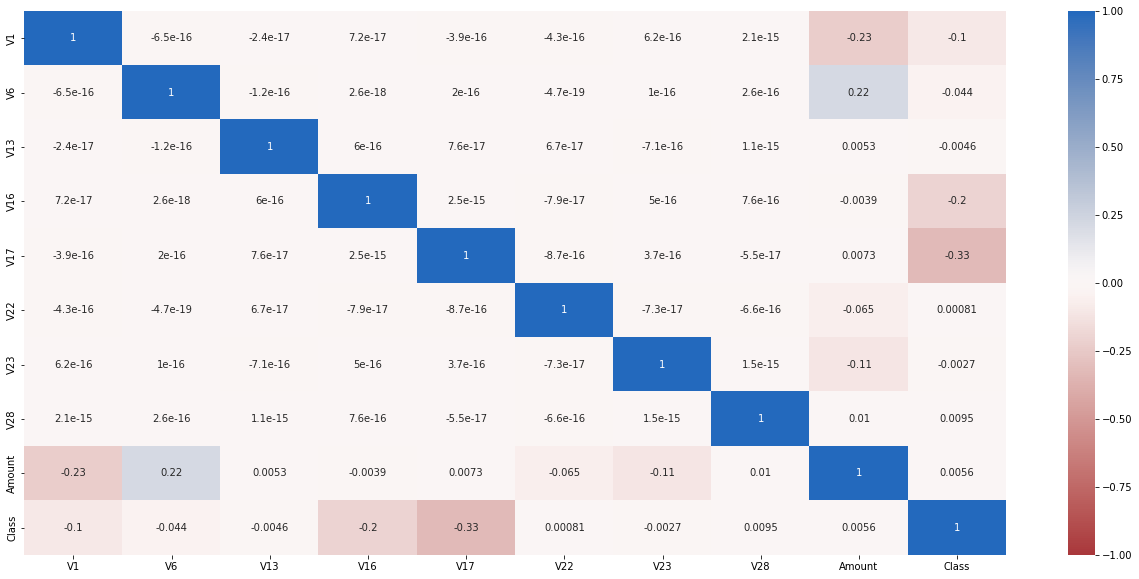

In [ ]:
_, ax = plt.subplots(figsize=(22,10))
sns.heatmap(data_2.corr(), annot = True, cmap = 'vlag_r', vmin = -1, vmax = 1,  ax = ax) 

In [ ]:
data_mean = data_2.mean()
data_std = data_2.std()
data_normalized = (data_2 - data_mean) / data_std #don't override data, once trained the model go back in the real world to predict there, not in the normalized world

data_normalized.describe()

,V1,V6,V13,V16,V17,V22,V23,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,2.095650e-17,3.991715e-18,6.336848e-18,2.145547e-17,-9.380530e-18,2.155526e-17,4.790058e-18,-7.060346e-18,3.193372e-17,-1.746375e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.879850e+01,-1.963602e+01,-5.819382e+00,-1.612532e+01,-2.962640e+01,-1.506562e+01,-7.175434e+01,-4.674604e+01,-3.532288e-01,-4.159891e-02
25%,-4.698909e-01,-5.766811e-01,-6.516187e-01,-5.341344e-01,-5.695599e-01,-7.473463e-01,-2.591780e-01,-1.604437e-01,-3.308395e-01,-4.159891e-02
50%,9.245335e-03,-2.058043e-01,-1.363248e-02,7.579241e-02,-7.732590e-02,9.345360e-03,-1.792417e-02,3.406362e-02,-2.652710e-01,-4.159891e-02
75%,6.716927e-01,2.991620e-01,6.656507e-01,5.971978e-01,4.705729e-01,7.283347e-01,2.364315e-01,2.371521e-01,-4.471699e-02,-4.159891e-02
max,1.253349e+00,5.502005e+01,7.160723e+00,1.976040e+01,1.089500e+01,1.447302e+01,3.607661e+01,1.025432e+02,1.023621e+02,2.403901e+01


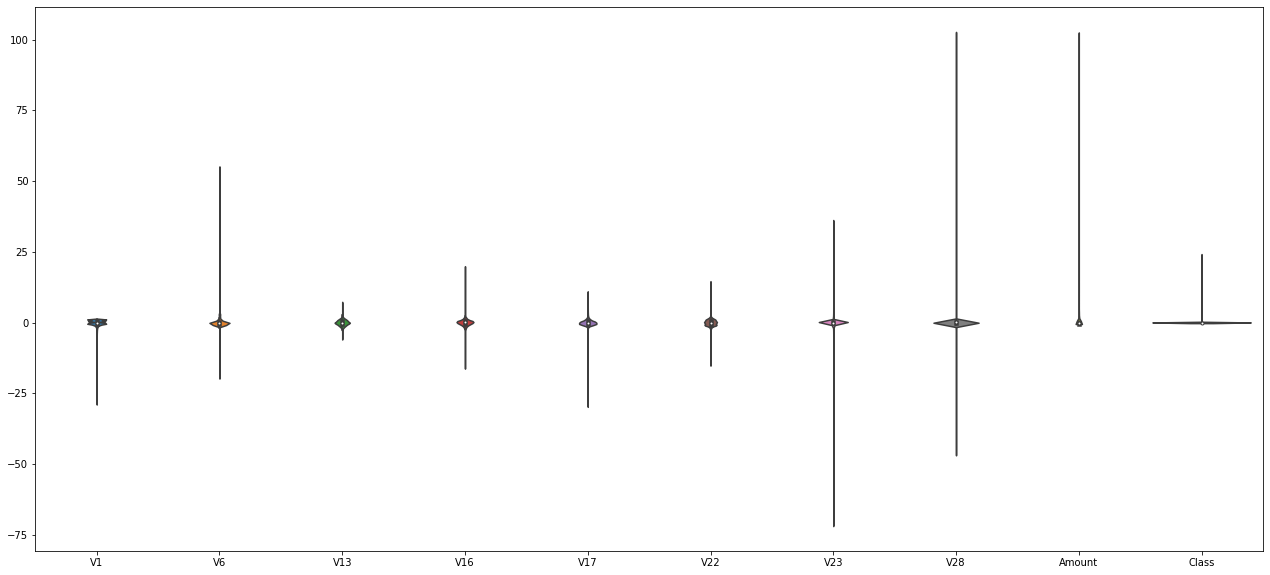

In [ ]:
_, ax = plt.subplots(figsize=(22,10))
sns.violinplot(data = data_normalized, ax = ax)

## Data normalization

Min-max scaling method.

In [ ]:
def min_max(data):
  """
  Apply the min-max scaling method to a numpy dataset with samples on rows and returns it.
  """
  data_min = data.min(axis=0) 
  data_max = data.max(axis=0) 
  data_normalized = (data - data_min[None,:]) / (data_max[None,:] - data_min[None,:]) # probably [None,:] is not necessary
  return data_normalized

## Train-validation split


In [ ]:
# maybe use cross-validation
# 60% train, 20% validation, 20% test, maybe it is not necessary having the validation
# maybe define a function here
# should check that the percentages are in (0., 1.)
def train_split(data_input, percentage_train=0.6, percentage_validation=0.2):
  """Split the data in train, validation and test."""
  data = data_input.copy()

  np.random.seed(0) # for reproducibility
  np.random.shuffle(data) # shuffle along first axis so rows

  num_train = int(data.shape[0] * percentage_train) 
  num_val = num_train + int(data.shape[0] * percentage_validation) 

  x_train = data[:num_train, :-1] #don't take last column that is the class
  y_train = data[:num_train, -1:] 
  x_valid = data[num_train:num_val, :-1]
  y_valid = data[num_train:num_val, -1:]
  x_test =  data[num_val:, :-1] 
  y_test =  data[num_val:, -1:]

  return x_train, y_train, x_valid, y_valid, x_test, y_test

##Metrics

In [ ]:
# Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

def metrics(predictions, true_labels, axis=None):
  """
  Compute and print metrics TP, TN, FP, FN, AC, RC, PC, F1.
  """
  TP = np.sum(np.logical_and(predictions == 1., true_labels == 1.)) # attacks accurately flagged as attacks
  TN = np.sum(np.logical_and(predictions == 0., true_labels == 0.)) # normal traffic accurately flagged as normal
  FP = np.sum(np.logical_and(predictions == 1., true_labels == 0.)) # normal traffic incorrectly flagged as attacks
  FN = np.sum(np.logical_and(predictions == 0., true_labels == 1.)) # attacks incorrectly flagged as normal 

  AC = ((TN + TP) / len(predictions)) * 100 # accuracy
  RC = (TP / (FN + TP)) * 100 # recall or sensitivity
  PR = (TP / (FP + TP)) * 100 # precision
  F1 = 2 * PR * RC / (PR + RC) # F1-Score
  SP = (TN / (FP + TN)) * 100 # specificity

  if axis is None:
    print('TP: %d' % TP)
    print('TN: %d' % TN)
    print('FP: %d' % FP)
    print('FN: %d' % FN)
    print('accuracy: %1.2f%%' % AC)
    print('recall: %1.2f%%' % RC)
    print('precision: %1.2f%%' % PR)
    print('F1-Score: %1.2f%%' % F1)
  else:
    text = 'accuracy %1.2f%%\nrecall: %1.2f%%\nprecision: %1.2f%%\nF1-Score: %1.2f%%' % (AC, RC, PR, F1)
    axis.annotate(text, xy=(0.75, 0.75), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.8", fc=(.5, 1., 1.)),
             fontsize=14, color='black')
  
  return 

##Logistic regression

In [ ]:
# can add more loss, like accuracy and MSE, add regularization? like in scikit-learn, tried regularization but it doesn't work because it classifies all like non-fraud
# penalize more error on frauds not detected, so the model pays more attention to this minority class
# usando x2 in y*logy aumenta del 5% la recall

# alternative to try
# resampling -> oversample the minority class or undersample the majority class, this will create a balanced dataset, allowing the classifier to better distinguish between the two classes.
def cross_entropy(x, y, weights, bias):
  """Cross entropy cost function."""
  y_pred = 1 / (1 + jnp.exp(-(bias + x @ weights)))
  return - jnp.sum(1.5 * y * jnp.log(y_pred) + 0.8 * (1-y) * jnp.log(1-y_pred)) # penalization factor can't be > 2, good with 1.7 and 0.8, doesn't work with the last dataset


grad = jax.grad(cross_entropy, argnums = [2,3])
grad_jit = jax.jit(grad)
cross_entropy_jit = jax.jit(cross_entropy)

In [ ]:
# using vanilla SGD, so without learning rate decay and batch size doesn't work
# we could add the callback
def SGD(x_train, y_train, x_valid=None, y_valid = None, num_epochs=50000, learning_rate_max=1e-1, \
        learning_rate_min = 1e-3, learning_rate_decay = 50000, batch_size = 32):
  """
  SGD method with mini-batch and learning rate decay.
  """
  validation = True if x_valid is not None and y_valid is not None else False

  weights = np.random.randn(x_train.shape[1], 1) # qua conviene mettere anche la seconda dimensione?
  bias = 0.0 

  history = list()
  # history.append(cross_entropy_jit(x_train, y_train, weights, bias))
  if validation:
    history_valid = list()
    # history_valid.append(cross_entropy_jit(x_valid, y_valid, weights, bias))

  for epoch in tqdm(range(num_epochs)):
    
    idxs = np.random.choice(x_train.shape[0], batch_size) # qua magari conviene usare una variabile
    grads = grad_jit(x_train[idxs,:], y_train[idxs,:], weights, bias)
    learning_rate = max(learning_rate_min, learning_rate_max * (1 - epoch/learning_rate_decay))
    weights -= learning_rate * grads[0]
    bias -= learning_rate * grads[1]

    if epoch % 10 == 0:
      history.append(cross_entropy_jit(x_train, y_train, weights, bias)) # this slows down the computation
      if validation:
        history_valid.append(cross_entropy_jit(x_valid, y_valid, weights, bias))

  #fig, axs = plt.subplots(1,1,figsize=(15,10))
  #print('train loss: %1.3e' % history[-1]) #confrontare con altre loss, es mse o accuracy
  #axs.plot(history, label='train')
  #if validation:
  #  print('validation loss: %1.3e' % history_valid[-1]) #confrontare con altre loss, es mse o accuracy
  #  axs.plot(history_valid, label='validation')
  #axs.legend()

  return weights, bias, history
#best loss: 9.407e+02

In [ ]:
# RMSPROP, non funziona bene perchè classifica tutto come 0

# Training options
num_epochs =  50000
learning_rate = 1e-3
batch_size = 32

decay_rate = 0.9
delta = 1e-7
#################################

weights = np.random.randn(x_train.shape[1], 1) # qua conviene mettere anche la seconda dimensione?, provare con inizializzazione random
bias = 0.0 

history = list()
history.append(cross_entropy_jit(x_train, y_train, weights, bias))


cumulated_square_weights = np.zeros(weights.shape)
cumulated_square_bias = 0.0
for epoch in tqdm(range(num_epochs)):
  
  idxs = np.random.choice(x_train.shape[0], batch_size) # qua magari conviene usare una variabile
  grads = grad_jit(x_train[idxs,:], y_train[idxs,:], weights, bias)
  cumulated_square_weights = decay_rate * cumulated_square_weights + (1. - decay_rate) * grads[0] * grads[0]
  cumulated_square_bias = decay_rate * cumulated_square_bias + (1. - decay_rate) * grads[1] * grads[1]
  weights -= learning_rate / (delta + jnp.sqrt(cumulated_square_weights)) * grads[0]
  bias -= learning_rate / (delta + jnp.sqrt(cumulated_square_bias)) * grads[1]

  if epoch % 10 == 0:
    history.append(cross_entropy_jit(x_train, y_train, weights, bias))

print('loss: %1.3e' % history[-1]) #confrontare con altre loss, es mse o accuracy
fig, axs = plt.subplots(1,1,figsize=(15,10))
axs.plot(history)



In [ ]:
def predict_logistic_regression(x, weights, bias):
  """
  Given the weights and bias of the model, 
  uses logistic regression to return predictions of the input x.
  The output is an array of 0 and 1.
  """
  y_pred = 1 / (1 + np.exp(-(bias + x @ weights)))
  predictions = np.array([0. if pred < 0.5 else 1. for pred in y_pred])[:, None] # by setting the threshold at 0.4 better results
  return predictions

## Testing LR

In [ ]:
data_np = data_5.to_numpy()
data_normalized_np = min_max(data_np)
x_train, y_train, _, _, x_test, y_test = train_split(data_normalized_np, percentage_train=0.7, percentage_validation=0.0)

weights, bias, history = SGD(x_train, y_train) # train model

fig, axs = plt.subplots(1,1,figsize = (15,10)) 
axs.plot(history)
axs.set_title('train loss: %1.3e' % history[-1])

predictions = predict_logistic_regression(x_test, weights, bias) # get predictions with the trained model
metrics(predictions, y_test) # compute metrics

NameError: ignored

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

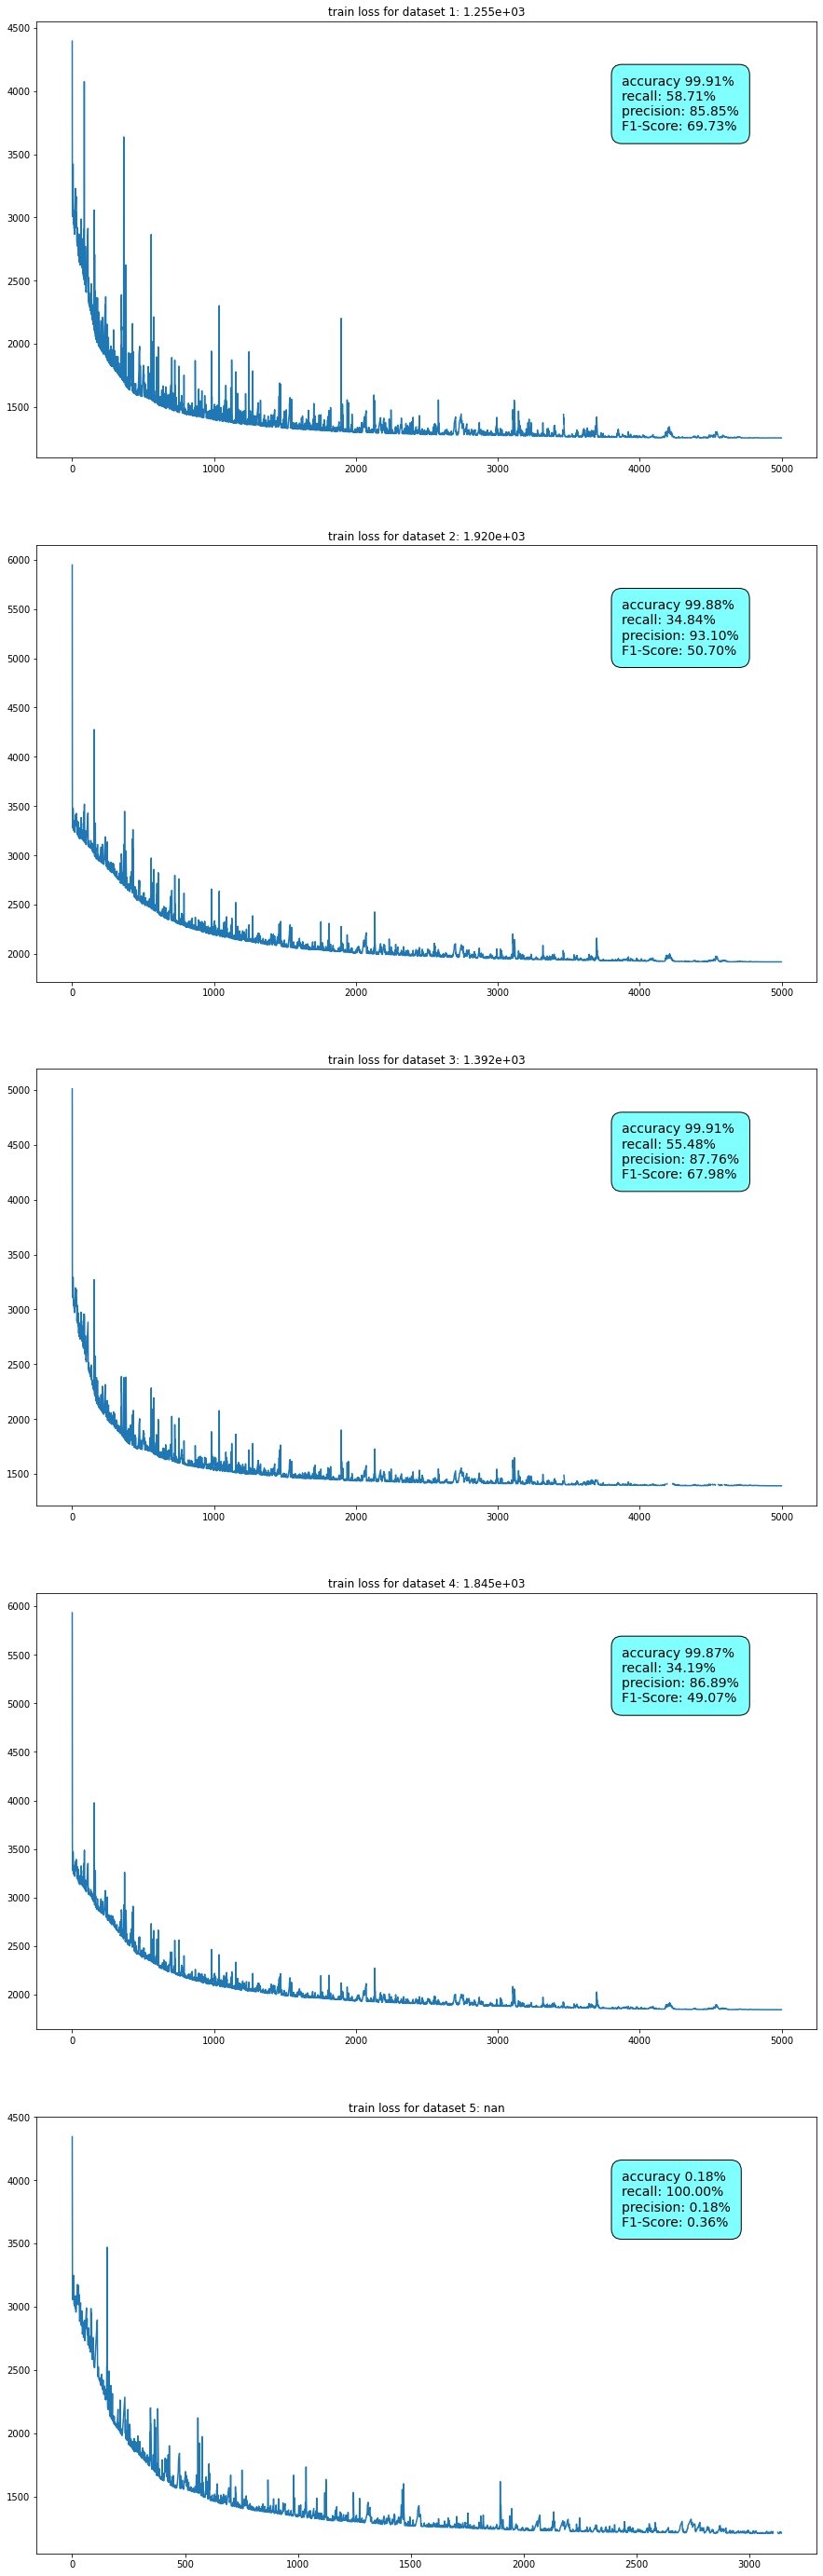

In [ ]:
datasets = [data_1, data_2, data_3, data_4, data_5]
fig, axs = plt.subplots(5,1,figsize = (15,50)) 

for i, dataset in enumerate(datasets):
  # pre-processing dataset
  dataset_np = dataset.to_numpy()
  dataset_normalized_np = min_max(dataset_np)
  x_train, y_train, _, _, x_test, y_test = train_split(dataset_normalized_np, percentage_train=0.7, percentage_validation=0.0)

  # train model
  weights, bias, history = SGD(x_train, y_train) 

  # print history loss of training
  axs[i].plot(history)
  axs[i].set_title('train loss for dataset %d: %1.3e' % (i+1, history[-1]))

  # get predictions with the trained model
  predictions = predict_logistic_regression(x_test, weights, bias) 

  # compute metrics
  metrics(predictions, y_test, axs[i]) 

train loss: 1.228e+03

accuracy: 99.92%

recall: 61.14%

precision: 85.51%

F1-Score: 71.30%

using 0.6 train and 0 validation, 40000 epochs

1.7, 0.8 in cross entropy


TP: 87

TN: 113718

FP: 12

FN: 106

accuracy: 99.90%

recall: 45.08%

precision: 87.88%

F1-Score: 59.59%

con v1 split del 60 % train e 40 % validation che ho usato come train

num_epochs =  50000

learning_rate_max = 1e-1

learning_rate_min = 1e-3

learning_rate_decay = 50000 #amount of epochs 
to reach the min learning rate

batch_size = 32

weights random

##Decision tree

In [ ]:
class Node: 
    """Class representing a node in the DecisionTree."""
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf(self):
        """Tell if the node is a leaf."""
        return self.value is not None


class DecisionTree:
    """Class representing a decision tree."""

    def __init__(self, max_depth=10, n_features=None, max_number_thresholds=np.nan, min_samples=2):
        self.max_depth = max_depth # max depth of the tree
        self.n_features = n_features # number of features to evaluate while branching
        self.max_number_thresholds = max_number_thresholds # max number of thresholds to evaluate while branching
        self.min_samples = min_samples # min number of samples in a node to branch 
        self.root = None

    def train(self, x, y):
        """Build the tree."""
        if self.n_features is None or self.n_features > x.shape[1]:
            self.n_features = x.shape[1] # assume x has features on columns 
        self.root = self.build_tree(x, y)
        
    def build_tree(self, x, y, depth=0):
        """Build the tree recursively and returns the root."""
        num_samples, num_features = x.shape
        num_values = len(np.unique(y)) # get number of different values in y 

        # check if need to create a leaf node
        if depth >= self.max_depth or num_samples < self.min_samples or num_values <= 1:
            return Node(value = self.get_value(y))

        # random select the features to evaluate
        features = np.random.choice(num_features, self.n_features, replace=False)
   
        # select best branch
        max_gain = -1
        branch_threshold= None
        branch_feature = None

        #print('split')
        # evaluate all selected features
        for feature in features:
            # select thresholds
            thresholds = np.random.choice(x[:, feature], min(self.max_number_thresholds, len(np.unique(x[:, feature]))), replace=False)
            # evaluate all selected thresholds
            for threshold in thresholds:
                gain = self.gain(x[:, feature], y, threshold)
            #TODO checkare se gia ragggiunto il massimo valore possibile
                if gain > max_gain:
                    max_gain = gain
                    branch_threshold = threshold
                    branch_feature = feature

        # build left branch
        left_idxs = x[:, branch_feature] <= branch_threshold
        left = self.build_tree(x[left_idxs, :], y[left_idxs, :], depth+1)
        # build right branch
        right_idxs = x[:, branch_feature] > branch_threshold
        right = self.build_tree(x[right_idxs, :], y[right_idxs, :], depth+1)
        return Node(branch_feature, branch_threshold, left, right)
            
    def gain_entropy(self, x, y, threshold): 
        """Compute the information gain."""
        if np.sum(x <= threshold) == 0 or np.sum(x > threshold) == 0:
          return 0
        weight_left = np.sum(x <= threshold) / len(y)
        weight_right = np.sum(x > threshold) / len(y)
        return self.entropy(y) - (weight_left * self.entropy(y[x <= threshold, :]) + weight_right * self.entropy(y[x > threshold, :]))


    def entropy(self, y): # using gini would not require the logarithm, more efficient
        """Compute the entropy."""
        p_ones = np.sum(y) / len(y)
        p_zeros = 1. - p_ones
        if p_ones == 0.:
          return - p_zeros * np.log(p_zeros)
        if p_zeros == 0.:
          return -  p_ones * np.log(p_ones)
        return -(p_zeros * np.log(p_zeros) + p_ones * np.log(p_ones))

    def gain(self, x, y, threshold):
        """Compute the information gain using gini."""
        left_idxs = x <= threshold
        right_idxs = x > threshold
        if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
          return 0
        weight_left = np.sum(left_idxs) / len(y)
        weight_right = np.sum(right_idxs) / len(y)
        return self.gini(y) - (weight_left * self.gini(y[left_idxs, :]) + weight_right * self.gini(y[right_idxs, :]))

    def gini(self, y):
        """Compute the gini index."""
        p_ones = np.sum(y) / len(y)
        p_zeros = 1. - p_ones
        return 1. - (p_zeros**2 + p_ones**2)

    def get_value(self, y):
         """Finds the most common value."""
         if len(y) == 0: #TODO what happens if I have a leaf node with 0 elements
            return np.random.choice([0., 1.])

         ones = np.sum(y)
         zeros = len(y) - ones
         return 1. if ones >= zeros else 0.

    def predict(self, x):
        """Returns the predictions."""
        return np.array([self.get_prediction(sample, self.root) for sample in x])[:,None] # return a column vector

    def get_prediction(self, x, node):
        """Recursively traverse the tree to make a prediction."""
        if node.is_leaf():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self.get_prediction(x, node.left)
        else:
            return self.get_prediction(x, node.right)


##Testing DT

In [ ]:
# pre-processing dataset
data_np = data_4.to_numpy()
data_normalized_np = min_max(data_np)
x_train, y_train, _, _, x_test, y_test = train_split(data_normalized_np, percentage_train=0.7, percentage_validation=0.0)

# train model
classifier = DecisionTree(max_depth=7, n_features=4, max_number_thresholds=500, min_samples=5) # higher max_thresh performs better but takes more time to train
classifier.train(x_train, y_train)

# get predictions with the trained model
predictions = classifier.predict(x_test)

# compute metrics
metrics(predictions, y_test) 

# pruning, or require a minimum number of samples per leaf per non rischiare overfitting

In [ ]:
datasets = [data_1, data_2, data_3, data_4, data_5]

for i, dataset in enumerate(datasets):
  # pre-processing dataset
  dataset_np = dataset.to_numpy()
  dataset_normalized_np = min_max(dataset_np)
  x_train, y_train, _, _, x_test, y_test = train_split(dataset_normalized_np, percentage_train=0.7, percentage_validation=0.0)

  # train model
  classifier = DecisionTree(max_depth=7, n_features=4, max_number_thresholds=100, min_samples=5) # higher max_thresh performs better but takes more time to train
  classifier.train(x_train, y_train)

  # get predictions with the trained model
  predictions = classifier.predict(x_test)

  # compute metrics
  print("Metrics for dataset %d" %(i+1))
  metrics(predictions, y_test) 

Metrics for dataset 1
TP: 113
TN: 85265
FP: 23
FN: 42
accuracy: 99.92%
recall: 72.90%
precision: 83.09%
F1-Score: 77.66%
Metrics for dataset 2
TP: 95
TN: 85269
FP: 19
FN: 60
accuracy: 99.91%
recall: 61.29%
precision: 83.33%
F1-Score: 70.63%
Metrics for dataset 3
TP: 102
TN: 85269
FP: 19
FN: 53
accuracy: 99.92%
recall: 65.81%
precision: 84.30%
F1-Score: 73.91%
Metrics for dataset 4
TP: 104
TN: 85271
FP: 17
FN: 51
accuracy: 99.92%
recall: 67.10%
precision: 85.95%
F1-Score: 75.36%
Metrics for dataset 5
TP: 110
TN: 85273
FP: 15
FN: 45
accuracy: 99.93%
recall: 70.97%
precision: 88.00%
F1-Score: 78.57%


## Random forest

In [ ]:
class RandomForest:
    """Class representing a random forest."""
    def __init__(self, n_trees=50, max_depth=10, n_features=None, max_number_thresholds=np.nan, min_samples=2):
        self.n_trees = n_trees
        self.max_depth = max_depth 
        self.n_features = n_features 
        self.max_number_thresholds = max_number_thresholds 
        self.min_samples = min_samples
        self.trees = []
    
    def train(self, x, y):
        """Build the forest."""   
        for i in range(self.n_trees):
            print('Building tree number %d' %(i+1))
            # create bootstrapped dataset
            n_samples = x.shape[0]
            idxs = np.random.choice(n_samples, n_samples, replace=True) # with replacement
            
            # train a tree
            tree = DecisionTree(self.max_depth, self.n_features, self.max_number_thresholds, self.min_samples)
            tree.train(x[idxs, :], y[idxs, :])
            self.trees.append(tree)


    def predict(self, x):
        """Returns the predictions by majority vote."""
        votes = np.array([tree.predict(x) for tree in self.trees])
        majorities = np.mean(votes, axis=0)
        majorities[majorities >= 0.5] = 1.
        majorities[majorities < 0.5] = 0.
        return majorities


## Testing RF

In [ ]:
# pre-processing dataset
data_np = data_4.to_numpy()
data_normalized_np = min_max(data_np)
x_train, y_train, _, _, x_test, y_test = train_split(data_normalized_np, percentage_train=0.7, percentage_validation=0.0)

# train model
classifier = RandomForest(n_trees=20, max_depth=5, n_features=3, max_number_thresholds=100, min_samples=5) 
classifier.train(x_train, y_train)

# get predictions with the trained model
predictions = classifier.predict(x_test)

# compute metrics
metrics(predictions, y_test) 


Building tree number 1
Building tree number 2
Building tree number 3
Building tree number 4
Building tree number 5
Building tree number 6
Building tree number 7
Building tree number 8
Building tree number 9
Building tree number 10
Building tree number 11
Building tree number 12
Building tree number 13
Building tree number 14
Building tree number 15
Building tree number 16
Building tree number 17
Building tree number 18
Building tree number 19
Building tree number 20
TP: 109
TN: 85271
FP: 17
FN: 46
accuracy: 99.93%
recall: 70.32%
precision: 86.51%
F1-Score: 77.58%


In [ ]:
datasets = [data_1, data_2, data_3, data_4, data_5]

for i, dataset in enumerate(datasets):
  # pre-processing dataset
  dataset_np = dataset.to_numpy()
  dataset_normalized_np = min_max(dataset_np)
  x_train, y_train, _, _, x_test, y_test = train_split(dataset_normalized_np, percentage_train=0.7, percentage_validation=0.0)

  # train model
  classifier = RandomForest(n_trees=15, max_depth=5, n_features=3, max_number_thresholds=50, min_samples=5) 
  classifier.train(x_train, y_train)

  # get predictions with the trained model
  predictions = classifier.predict(x_test)

  # compute metrics
  print("Metrics for dataset %d" %(i+1))
  metrics(predictions, y_test) 

Building tree number 1
Building tree number 2
Building tree number 3
Building tree number 4
Building tree number 5
Building tree number 6
Building tree number 7
Building tree number 8
Building tree number 9
Building tree number 10
Building tree number 11
Building tree number 12
Building tree number 13
Building tree number 14
Building tree number 15
Metrics for dataset 1
TP: 89
TN: 85279
FP: 9
FN: 66
accuracy: 99.91%
recall: 57.42%
precision: 90.82%
F1-Score: 70.36%
Building tree number 1
Building tree number 2
Building tree number 3
Building tree number 4
Building tree number 5
Building tree number 6
Building tree number 7
Building tree number 8
Building tree number 9
Building tree number 10
Building tree number 11
Building tree number 12
Building tree number 13
Building tree number 14
Building tree number 15
Metrics for dataset 2
TP: 101
TN: 85270
FP: 18
FN: 54
accuracy: 99.92%
recall: 65.16%
precision: 84.87%
F1-Score: 73.72%
Building tree number 1
Building tree number 2
Building tre